# Первая часть. Исследование

In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [234]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [161]:
#списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на насколько строк нашей таблицы.

In [123]:
train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2707,69,84.70,5878.9,Male,0,Yes,No,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,0
2099,5,19.85,108.05,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),1
4712,51,99.00,5038.15,Male,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
1788,53,97.75,5043.2,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,One year,No,Bank transfer (automatic),0
1784,65,24.75,1715.1,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0


In [124]:
# видим что явных пропусков в таблице нет, однако числовая колонка TotalSpent имеет строковый тип данных, проверим.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [235]:
train['TotalSpent'].value_counts().head()

         9
20.2     9
19.75    8
20.05    6
19.65    6
Name: TotalSpent, dtype: int64

In [236]:
# пустые значения в тех строках, где значение ClientPeriod = 0, значит и в TotalSpent их разумно заменить на 0
train.query('TotalSpent == " "')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [238]:
# заменим на 0 и приведем к числовому типу
train['TotalSpent'] = train['TotalSpent'].replace(' ', 0).astype(float)

In [239]:
# тоже самое проделаем с test, сначала проверим
test.query('TotalSpent == " "')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [240]:
# заметим что так же в test нет пропусков
test['TotalSpent'] = test['TotalSpent'].replace(' ', 0).astype(float)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [130]:
# посмтрим описательную статистику колонок
train.describe(include='all')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
count,5282.000000,5282.000000,5282.000000,5282,5282.000000,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282.000000
unique,NaN,NaN,NaN,2,NaN,2,2,2,3,3,3,3,3,3,3,3,3,2,4,NaN
top,NaN,NaN,NaN,Male,NaN,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN
freq,NaN,NaN,NaN,2655,NaN,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786,NaN
mean,32.397009,64.924754,2287.486161,NaN,0.159409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.262022
std,24.550326,30.176464,2269.049195,NaN,0.366092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.439776
min,0.000000,18.250000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,9.000000,35.462500,395.725000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,29.000000,70.400000,1405.650000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,55.000000,90.050000,3795.212500,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Видим что выбросов в числовых фичах нет, да и с категориальными все в порядке.

In [131]:
for col in cat_cols:
    print(col.ljust(24) + ': ',train[col].unique())

Sex                     :  ['Male' 'Female']
IsSeniorCitizen         :  [0 1]
HasPartner              :  ['Yes' 'No']
HasChild                :  ['Yes' 'No']
HasPhoneService         :  ['Yes' 'No']
HasMultiplePhoneNumbers :  ['No' 'Yes' 'No phone service']
HasInternetService      :  ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService:  ['No internet service' 'No' 'Yes']
HasOnlineBackup         :  ['No internet service' 'No' 'Yes']
HasDeviceProtection     :  ['No internet service' 'No' 'Yes']
HasTechSupportAccess    :  ['No internet service' 'Yes' 'No']
HasOnlineTV             :  ['No internet service' 'No' 'Yes']
HasMovieSubscription    :  ['No internet service' 'No' 'Yes']
HasContractPhone        :  ['One year' 'Two year' 'Month-to-month']
IsBillingPaperless      :  ['No' 'Yes']
PaymentMethod           :  ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


В колонках, где присутсвуют только два значения, заменим этм значения на 1 и 0.

In [241]:
for col in ['HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless']:
    train[col] = train[col].apply(lambda x: 1 if 'Yes' else 0)
    test[col] = test[col].apply(lambda x: 1 if 'Yes' else 0)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [47]:
!pip install phik

Посмотрим на корреляцию фичей, используя Phik. Она не показывает, прямая или обратная зависимость, однако работает и с категориальными колонками, а так же может обнаружить даже нелинейные зависимости. Принимает значения от 0 до 1.

interval columns not set, guessing: ['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless', 'Churn']


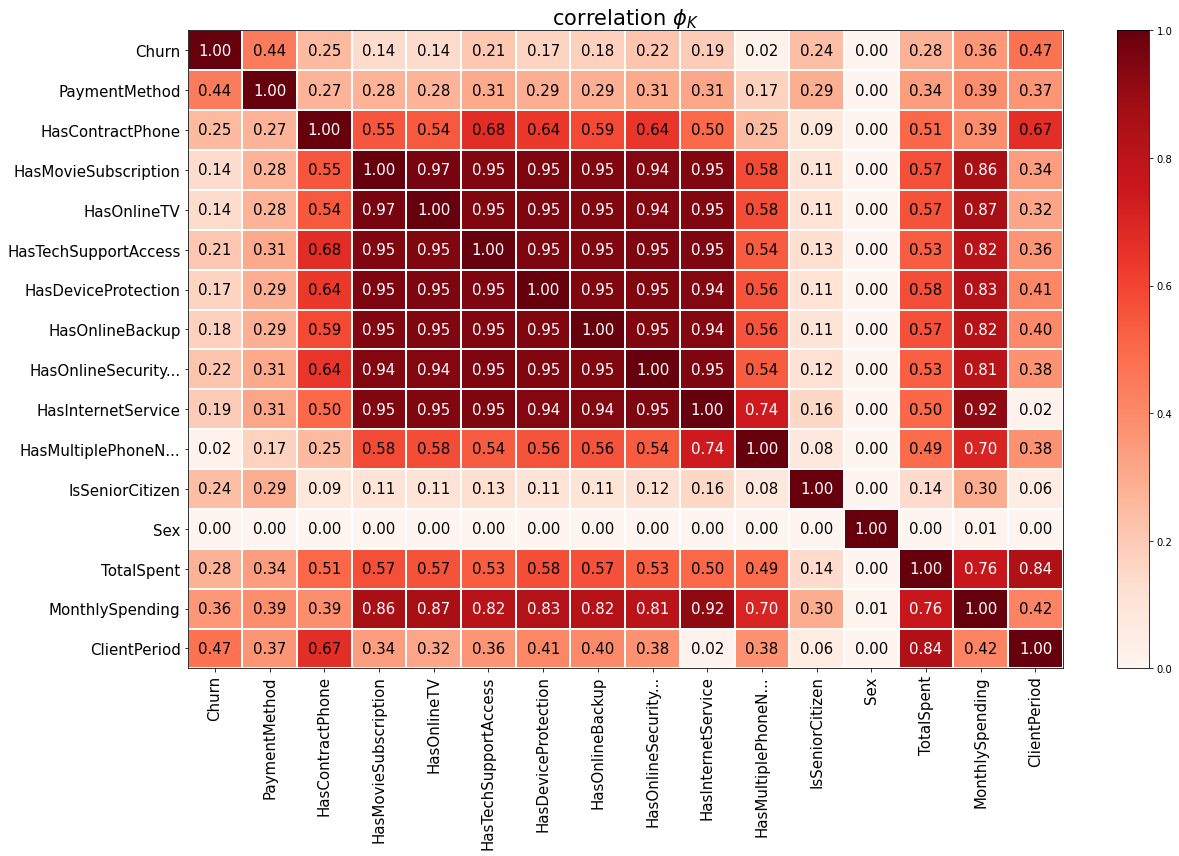

In [133]:
import phik
from phik.report import plot_correlation_matrix
phik_overview = train.phik_matrix()
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Reds',
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(18, 12))
plt.tight_layout();

Как видно, много категориальных столбцов имеют очень сильную зависимость.

Построим столбчатые гистограммы и распределения признаков для ушедших и оставшихся клиентов(**Churn**)

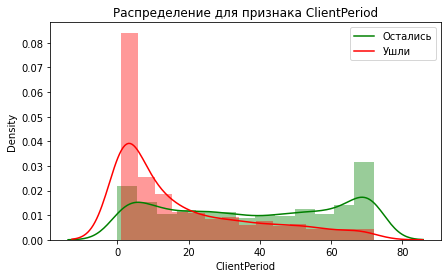

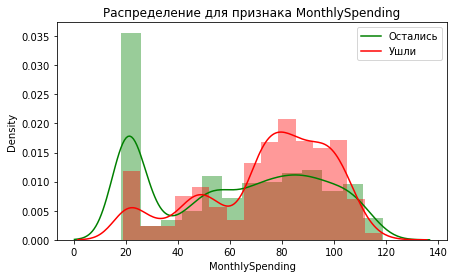

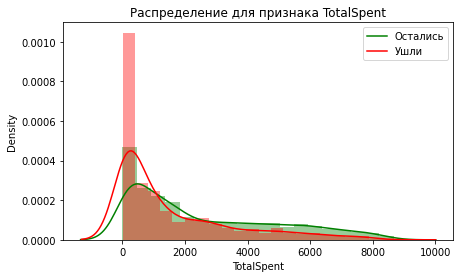

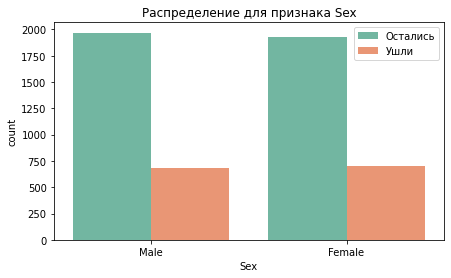

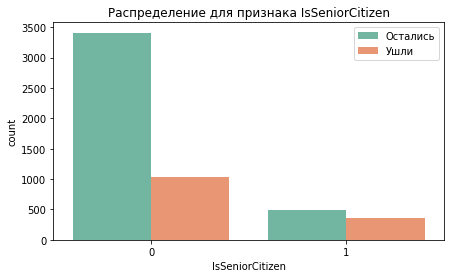

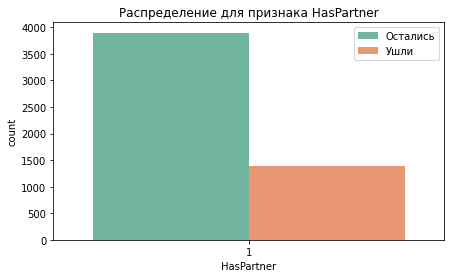

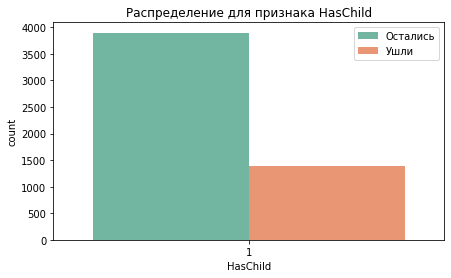

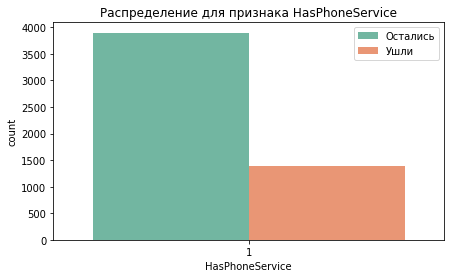

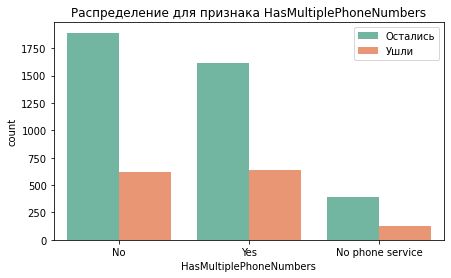

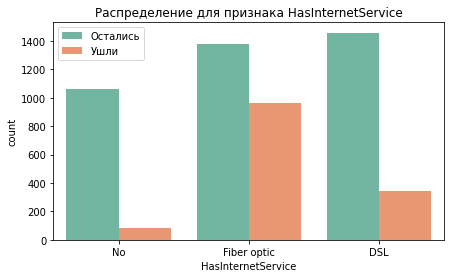

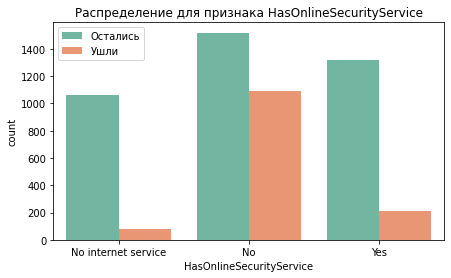

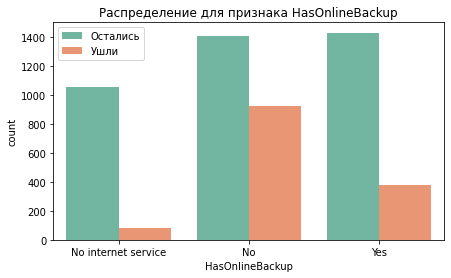

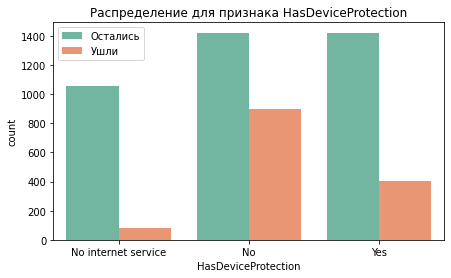

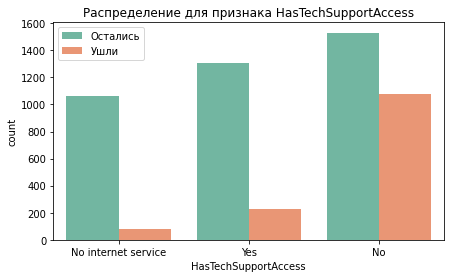

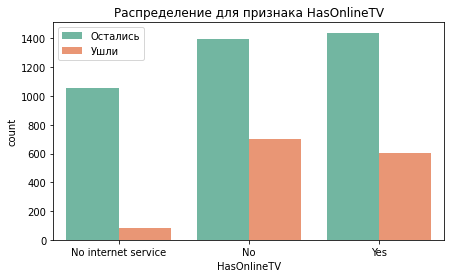

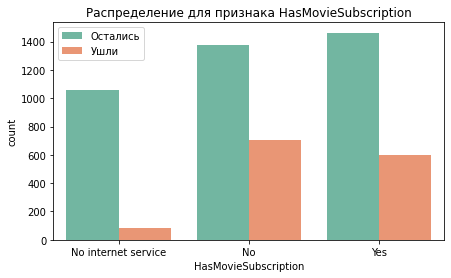

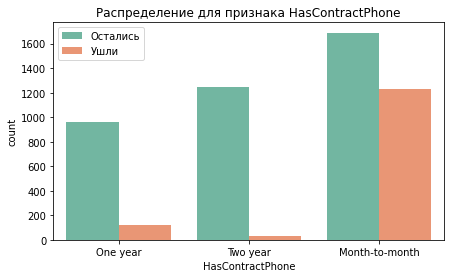

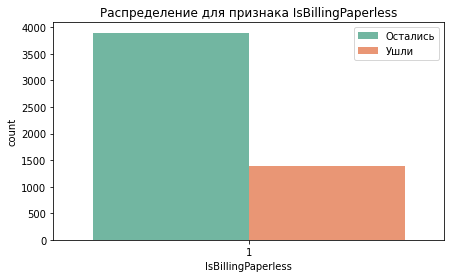

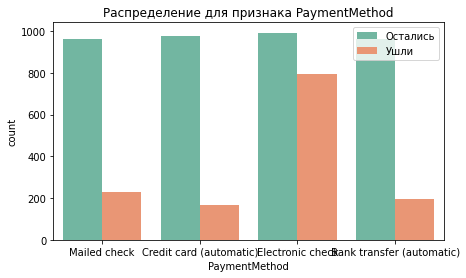

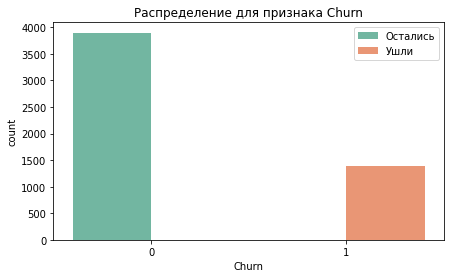

In [134]:
for col in train.columns:
    if len(train[col].unique()) > 4:
        plt.figure(figsize=(7, 4))
        sns.distplot(train.query('Churn == 0')[col],color='g')
        sns.distplot(train.query('Churn == 1')[col], color='r')
        plt.legend(labels = ('Остались', 'Ушли'))
        plt.title('Распределение для признака ' + col)
        plt.show()
    else:
        plt.figure(figsize=(7, 4))
        sns.countplot(x=col, hue='Churn', data=train, palette='Set2')
        plt.legend(labels = ('Остались', 'Ушли'))
        plt.title('Распределение для признака ' + col)
        plt.show()

На графиках можно увидеть влияние некоторых признаков на отток клиентов, а также на дисбаланс классов целевой переменной. Посмотрим в цифрах.

In [135]:
#около 26% ушедших клиентов. Классы несбалансированны.
train['Churn'].mean()

0.26202196137826583

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [147]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [242]:
X_train = train.drop('Churn', axis = 1)
y_train = train['Churn']

In [243]:
sc = StandardScaler()
X_train_sc = X_train.copy()
test_sc = test.copy()
X_train_sc[num_cols] = sc.fit_transform(X_train_sc[num_cols])
test_sc[num_cols] = sc.transform(test_sc[num_cols])

In [244]:
X_train_sc = pd.get_dummies(X_train_sc)
test_sc = pd.get_dummies(test_sc)

In [245]:
param = {
    'penalty' : ['l1','l2','elasticnet', None], 
    'C'       : np.logspace(-3,3,7)
}

In [246]:
lr = LogisticRegression()
gs = GridSearchCV(lr, param_grid = param,scoring='roc_auc', cv=5, n_jobs=-1, verbose=10)

gs.fit(X_train_sc, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='roc_auc', verbose=10)

In [233]:
gs.best_score_, gs.best_params_

(0.8443353427261464, {'C': 1000.0, 'penalty': 'l2'})

In [303]:
lr = LogisticRegression(penalty='l2', C=1000, random_state=8)
result = lr.fit(X_train_sc, y_train)

In [304]:
roc_auc_score(y_train, result.predict_proba(X_train_sc)[:, 1])

0.8472970057269624

In [251]:
X_train_ohe = pd.get_dummies(X_train)

In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state = 0)
params = {
    'n_estimators': np.arange(100,701,100),
    'max_depth': np.arange(4, 11),
}
gs = GridSearchCV(rfc, params, scoring='roc_auc', cv=5,n_jobs=-1, verbose=10)
gs.fit(X_train_ohe, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700])},
             scoring='roc_auc', verbose=10)

In [257]:
gs.best_score_, gs.best_params_

(0.8442122005633186, {'max_depth': 6, 'n_estimators': 500})

In [300]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=8)
result = rfc.fit(X_train_ohe, y_train)

In [302]:
roc_auc_score(y_train, result.predict_proba(X_train_ohe)[:, 1])

0.8695548814124332

Лучший скор у случайного леса : 0.86955

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [259]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.1 MB/s 


In [263]:
import catboost
from sklearn.metrics import roc_auc_score, roc_curve

In [294]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=cat_cols)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]


Learning rate set to 0.091733
0:	learn: 0.6422191	total: 15.4ms	remaining: 3.06s
1:	learn: 0.6000000	total: 29.1ms	remaining: 2.88s
2:	learn: 0.5721484	total: 45.4ms	remaining: 2.98s
3:	learn: 0.5390647	total: 60.3ms	remaining: 2.95s
4:	learn: 0.5152190	total: 75.5ms	remaining: 2.94s
5:	learn: 0.4990346	total: 84.9ms	remaining: 2.74s
6:	learn: 0.4833701	total: 99.3ms	remaining: 2.74s
7:	learn: 0.4694952	total: 114ms	remaining: 2.75s
8:	learn: 0.4603582	total: 126ms	remaining: 2.67s
9:	learn: 0.4515424	total: 139ms	remaining: 2.63s
10:	learn: 0.4449271	total: 154ms	remaining: 2.64s
11:	learn: 0.4383482	total: 168ms	remaining: 2.63s
12:	learn: 0.4332965	total: 183ms	remaining: 2.63s
13:	learn: 0.4291880	total: 197ms	remaining: 2.61s
14:	learn: 0.4250984	total: 222ms	remaining: 2.73s
15:	learn: 0.4219271	total: 236ms	remaining: 2.72s
16:	learn: 0.4198525	total: 252ms	remaining: 2.72s
17:	learn: 0.4174774	total: 265ms	remaining: 2.68s
18:	learn: 0.4165328	total: 274ms	remaining: 2.61s
19:	

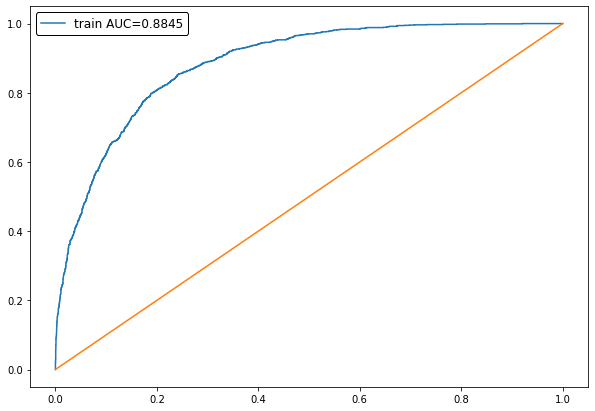

In [295]:
train_auc = roc_auc_score(y_train, y_train_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Лучший скор по метрике roc_auc = 0.8845

# Предсказания

In [271]:
best_model = boosting_model

In [277]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)


In [279]:
submission['Churn'] = 1 - submission['Churn']
submission

,Id,Churn
0,0,0.044699
1,1,0.717922
2,2,0.649071
3,3,0.016161
4,4,0.002595
...,...,...
1756,1756,0.164335
1757,1757,0.007152
1758,1758,0.837583
1759,1759,0.513754


In [280]:
submission.to_csv('./my_submission.csv', index=False)

**Скор на кагле : Score: 0.85032**

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.